In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] ='Malgun Gothic'

In [31]:
df=pd.read_excel('./5070_시니어_소비생활.xlsx')
df.sort_values(by='전체',ascending=False,inplace=True)

Text(0.5, 1.0, '여성')

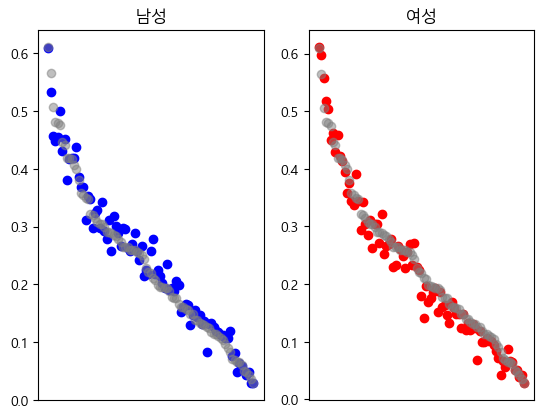

In [32]:
fig=plt.figure()

ax1=fig.add_subplot(1,2,1)
ax1.scatter(np.arange(len(df)),df['남자'],c='b')
ax1.scatter(np.arange(len(df)),df['전체'],c='grey',alpha=0.5)
ax1.set_xticks([])
ax1.set_title('남성')

ax2=fig.add_subplot(1,2,2)
ax2.scatter(np.arange(len(df)),df['여자'],c='r')
ax2.scatter(np.arange(len(df)),df['전체'],c='grey',alpha=0.5)
ax2.set_xticks([])
ax2.set_title('여성')

정교수 83:17
전임교원 74:26

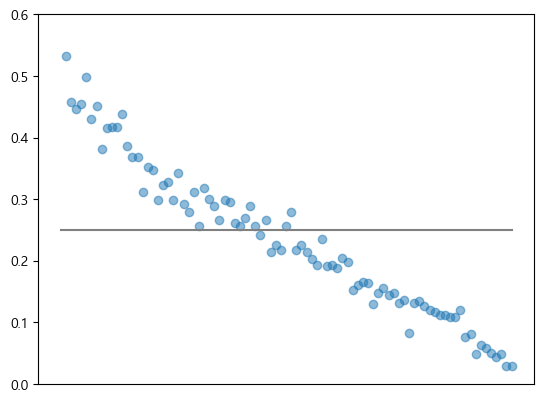

In [42]:
plt.scatter(np.arange(len(df)),df['남자'],alpha=0.5)
plt.xticks([])
plt.ylim([0,0.6])

standard_line=[0.25]*len(df)
plt.plot(np.arange(len(df)),standard_line,color='grey') #0.348

plt.show()

In [34]:
df['남성_열세']=df['남자']-df['여자']
df_2=df.loc[df['전체']>=0.348].sort_values(by='남자',ascending=False)

m_mean=pd.DataFrame(df_2.groupby('분류')['남자'].mean())
m_num=df_2['분류'].value_counts().rename_axis('분류').to_frame('counts').sort_index()

m_mean['빈도']=m_num
m_mean['기대값']=m_mean['남자']*m_mean['빈도']
m_mean.sort_values(by='기대값',ascending=False,inplace=True)

print(m_mean)

              남자  빈도    기대값
분류                         
고령친화상품  0.438250   4  1.753
의류미용    0.414667   3  1.244
식품외식    0.413333   3  1.240
금융보험    0.493500   2  0.987
주거가전    0.489000   2  0.978
의료건강    0.399500   2  0.799
교통통신여가  0.369000   2  0.738


In [35]:
m_mean['기대값'].describe()

count    7.000000
mean     1.105571
std      0.345405
min      0.738000
25%      0.888500
50%      0.987000
75%      1.242000
max      1.753000
Name: 기대값, dtype: float64

<Axes: xlabel='분류'>

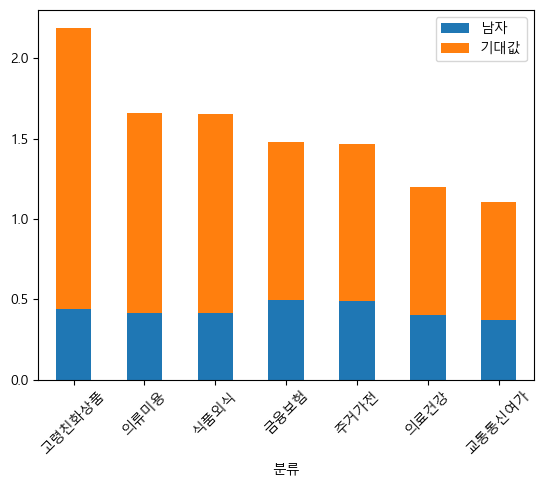

In [41]:
m_mean.loc[:,['남자','기대값']].plot.bar(stacked=True,rot=45)

In [ ]:
sr_friendly=df_2.loc[df_2['분류']=='고령친화상품']
meal=df_2.loc[df_2['분류']=='식품외식']
beauty=df_2.loc[df_2['분류']=='의류미용']

male_topic=pd.concat([sr_friendly,meal,beauty],ignore_index=True)
male_topic.sort_values(by='남성_열세',ascending=False,inplace=True)
male_topic